In [111]:
from utils import *
sns.set_style("ticks")
pd.options.display.max_rows = 20
%matplotlib inline

# Hazard Histograms

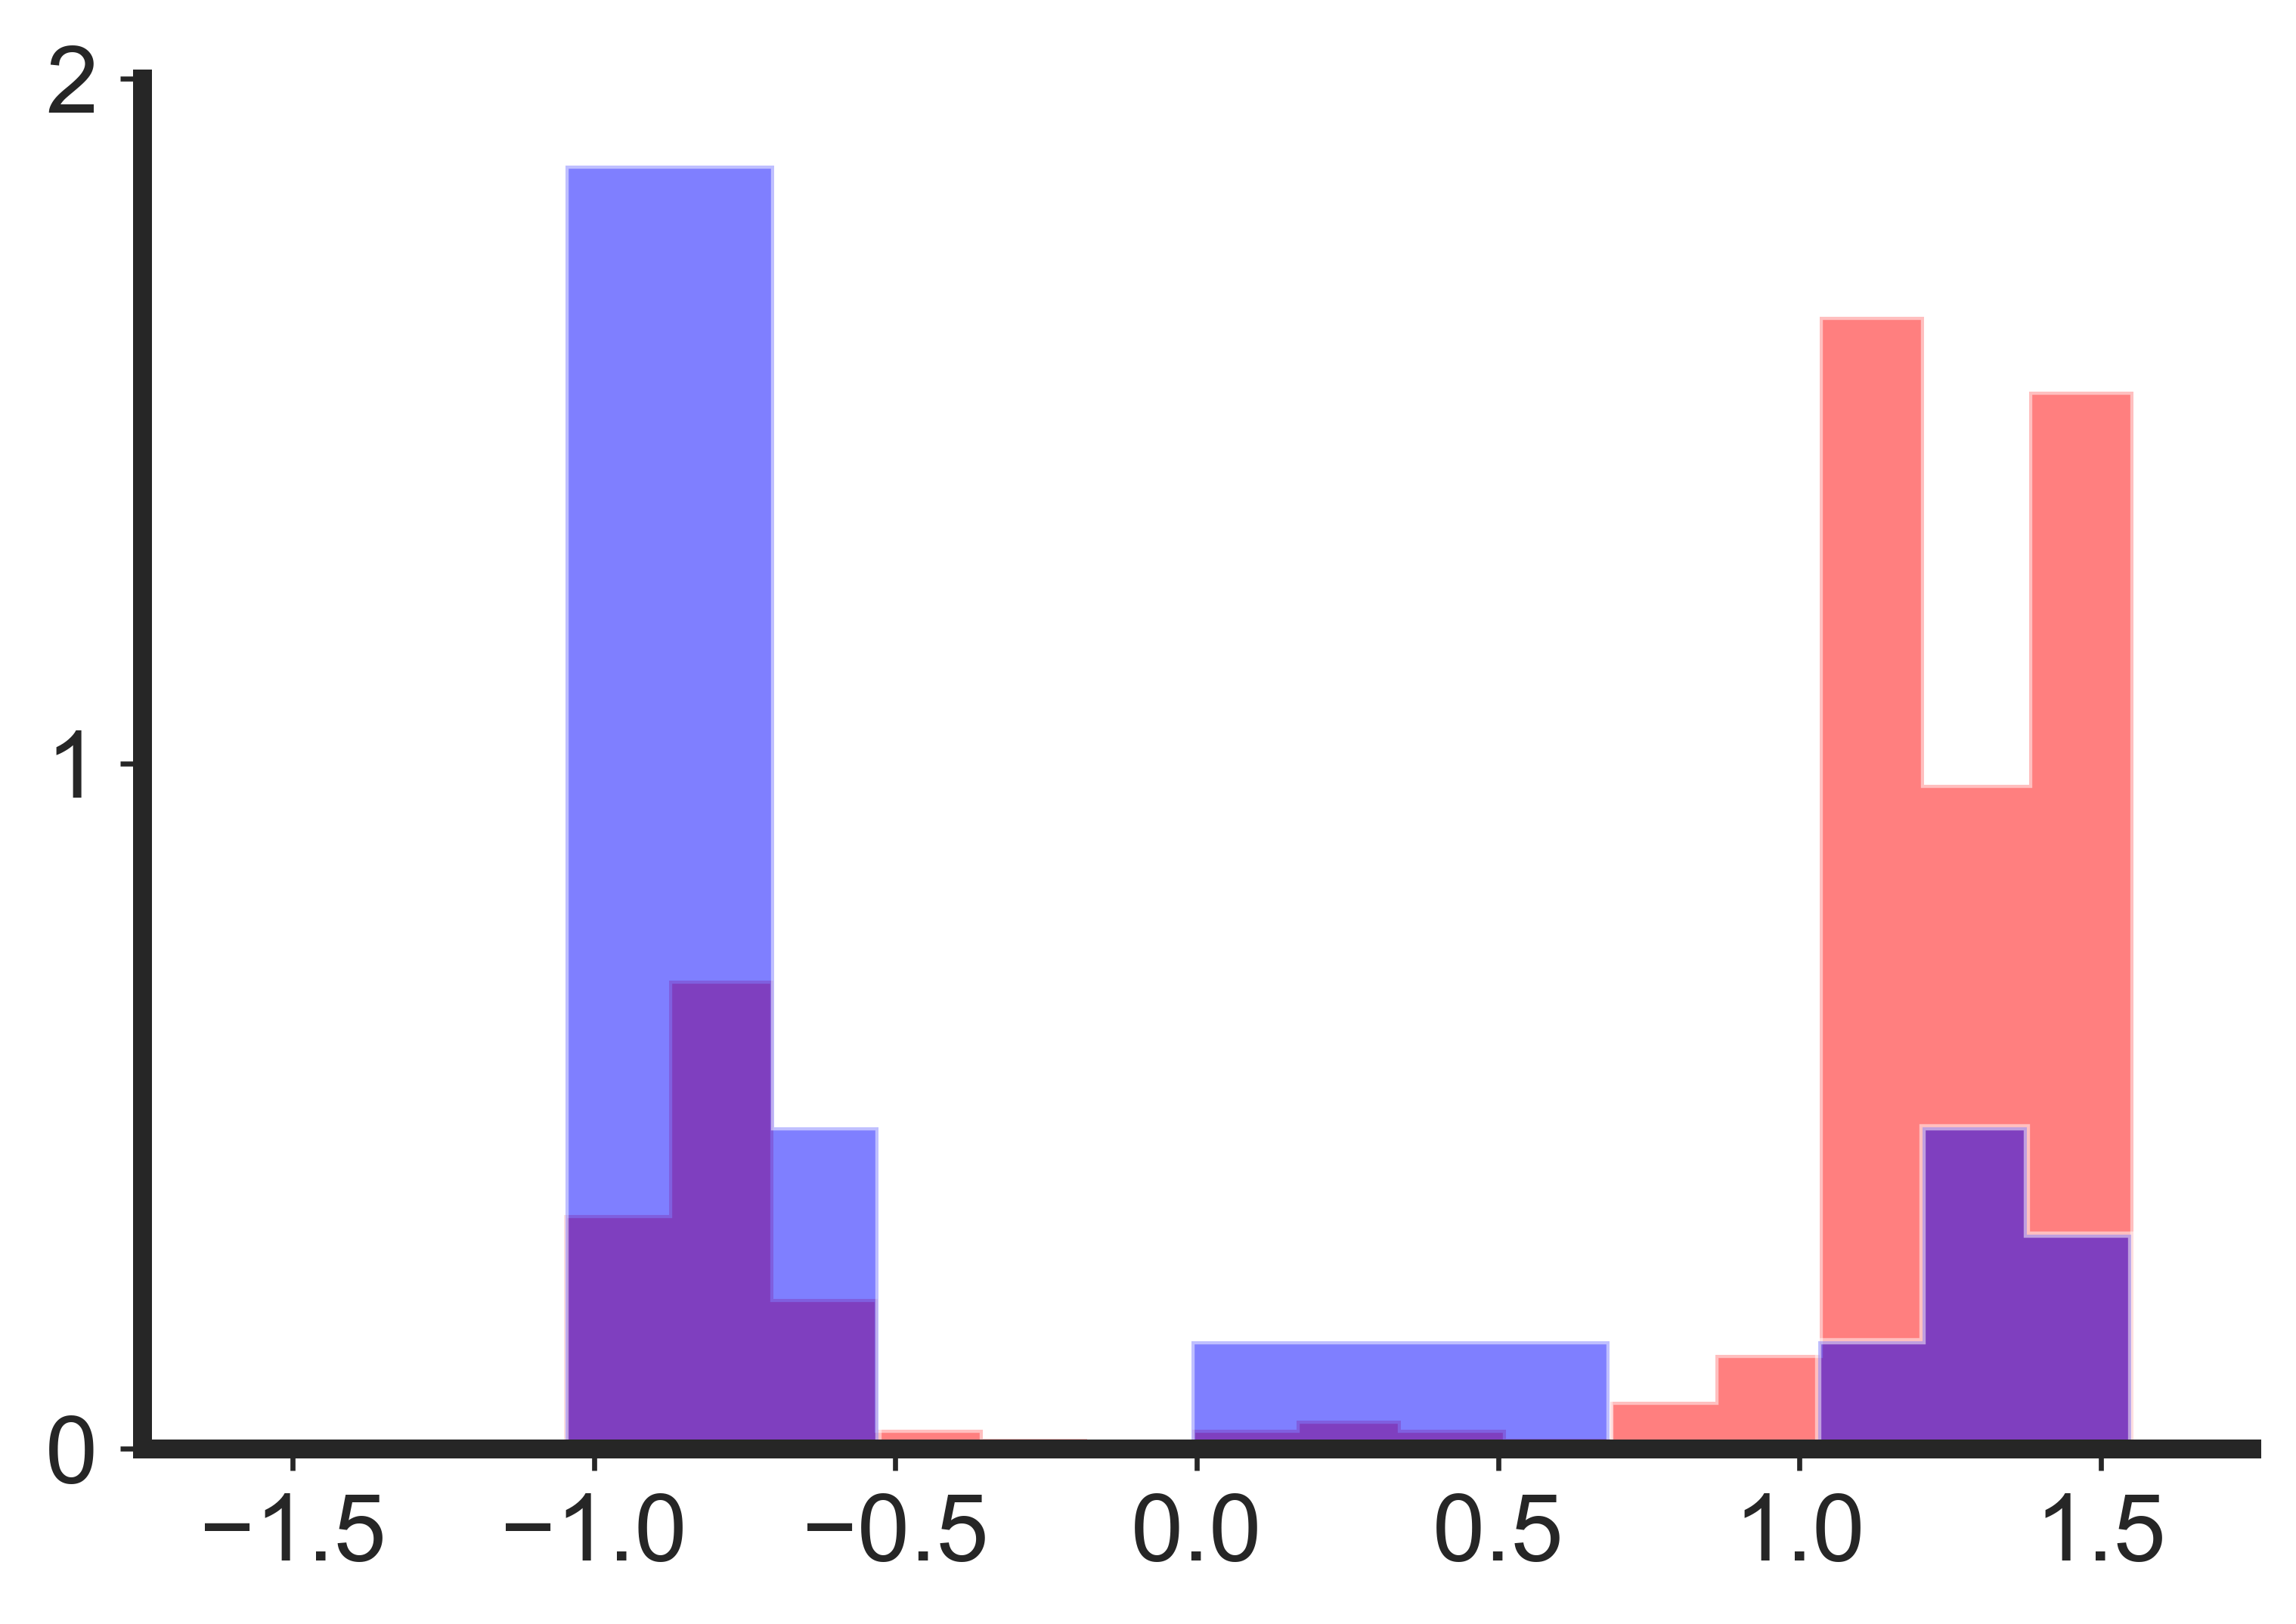

In [112]:
ckpt_name='./checkpoints/surv_15_rnaseq/'
model = 'pathgraphomic_fusion'
split = 'test'
zscore = True
agg_type = 'Hazard_mean'

data = poolSurvTestPD(ckpt_name=ckpt_name, model=model, split=split, zscore=zscore, agg_type=agg_type)

norm = True
fig, ax = plt.subplots(dpi=600)

low = data[data['Survival months'] <= 365*5]
low = low[low['censored'] == 1]
#mid = data[data['Survival months'] > 365*1.6]
#mid = mid[mid['Survival months'] <= 365*7]
#mid = mid[mid['censored'] == 1]
high = data[data['Survival months'] > 365*5]
high = high[high['censored'] == 1]

sns.distplot(low['Hazard'], bins=15, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "r"}, ax=ax)
'''
sns.distplot(mid['Hazard'], bins=30, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "b"}, ax=ax)
'''
sns.distplot(high['Hazard'], bins=15, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "b"}, ax=ax)

ax.set_xlabel('')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='y', which='both', labelsize=15)
ax.tick_params(axis='x', which='both', labelsize=15)
ax.set_xticks(np.arange(-1.5, 1.51, 0.5))
plt.xlim([-1.75, 1.75])
if norm:
    ax.set_yticks(np.arange(0, 2.1, 1))
    plt.ylim([0, 2])
    
fig.savefig(ckpt_name+'/%s_HHP_V2.png' % (model))

low_pgo = low
high_pgo = high

In [113]:
cluster1 = data[data['Hazard'] < 1.25]
cluster1 = cluster1[cluster1['Hazard'] > 1.0]
num_cluster1 = cluster1.shape[0]
cluster1_II = (cluster1['Grade'] == 0).sum() / num_cluster1
cluster1_III = (cluster1['Grade'] == 1).sum() / num_cluster1
cluster1_IV = (cluster1['Grade'] == 2).sum() / num_cluster1
cluster1_ODG = (cluster1['Histomolecular subtype'] == 'ODG').sum() / num_cluster1
cluster1_IDHmut = (cluster1['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster1
cluster1_IDHwt = (cluster1['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster1
cluster1_summary = [cluster1_II, cluster1_III, cluster1_IV, cluster1_ODG, cluster1_IDHmut, cluster1_IDHwt]

cluster2 = data[data['Hazard'] > 1.25]
num_cluster2 = cluster2.shape[0]
cluster2_II = (cluster2['Grade'] == 0).sum() / num_cluster2
cluster2_III = (cluster2['Grade'] == 1).sum() / num_cluster2
cluster2_IV = (cluster2['Grade'] == 2).sum() / num_cluster2
cluster2_ODG = (cluster2['Histomolecular subtype'] == 'ODG').sum() / num_cluster2
cluster2_IDHmut = (cluster2['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster2
cluster2_IDHwt = (cluster2['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster2
cluster2_summary = [cluster2_II, cluster2_III, cluster2_IV, cluster2_ODG, cluster2_IDHmut, cluster2_IDHwt]

cluster3 = data[data['Hazard'] < -0.5]
num_cluster3 = cluster3.shape[0]
cluster3_II = (cluster3['Grade'] == 0).sum() / num_cluster3
cluster3_III = (cluster3['Grade'] == 1).sum() / num_cluster3
cluster3_IV = (cluster3['Grade'] == 2).sum() / num_cluster3
cluster3_ODG = (cluster3['Histomolecular subtype'] == 'ODG').sum() / num_cluster3
cluster3_IDHmut = (cluster3['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster3
cluster3_IDHwt = (cluster3['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster3
cluster3_summary = [cluster3_II, cluster3_III, cluster3_IV, cluster3_ODG, cluster3_IDHmut, cluster3_IDHwt]

cluster_results = pd.DataFrame([cluster3_summary, cluster1_summary, cluster2_summary])
cluster_results.index = ['-1.00 < Hazard < -0.50', '1.00 < Hazard < 1.25', '1.25 < Hazard < 1.50']
cluster_results.index.name = 'Density Region'
cluster_results.columns = ['Grade II (%)', 'Grade III (%)', 'Grade IV (%)', 'IDHwt ATC (%)', 'IDHmut ATC (%)', 'IDHwt ATC (%)']
cluster_results *= 100
pd.options.display.float_format = '{:.2f}'.format
cluster_results1 = cluster_results

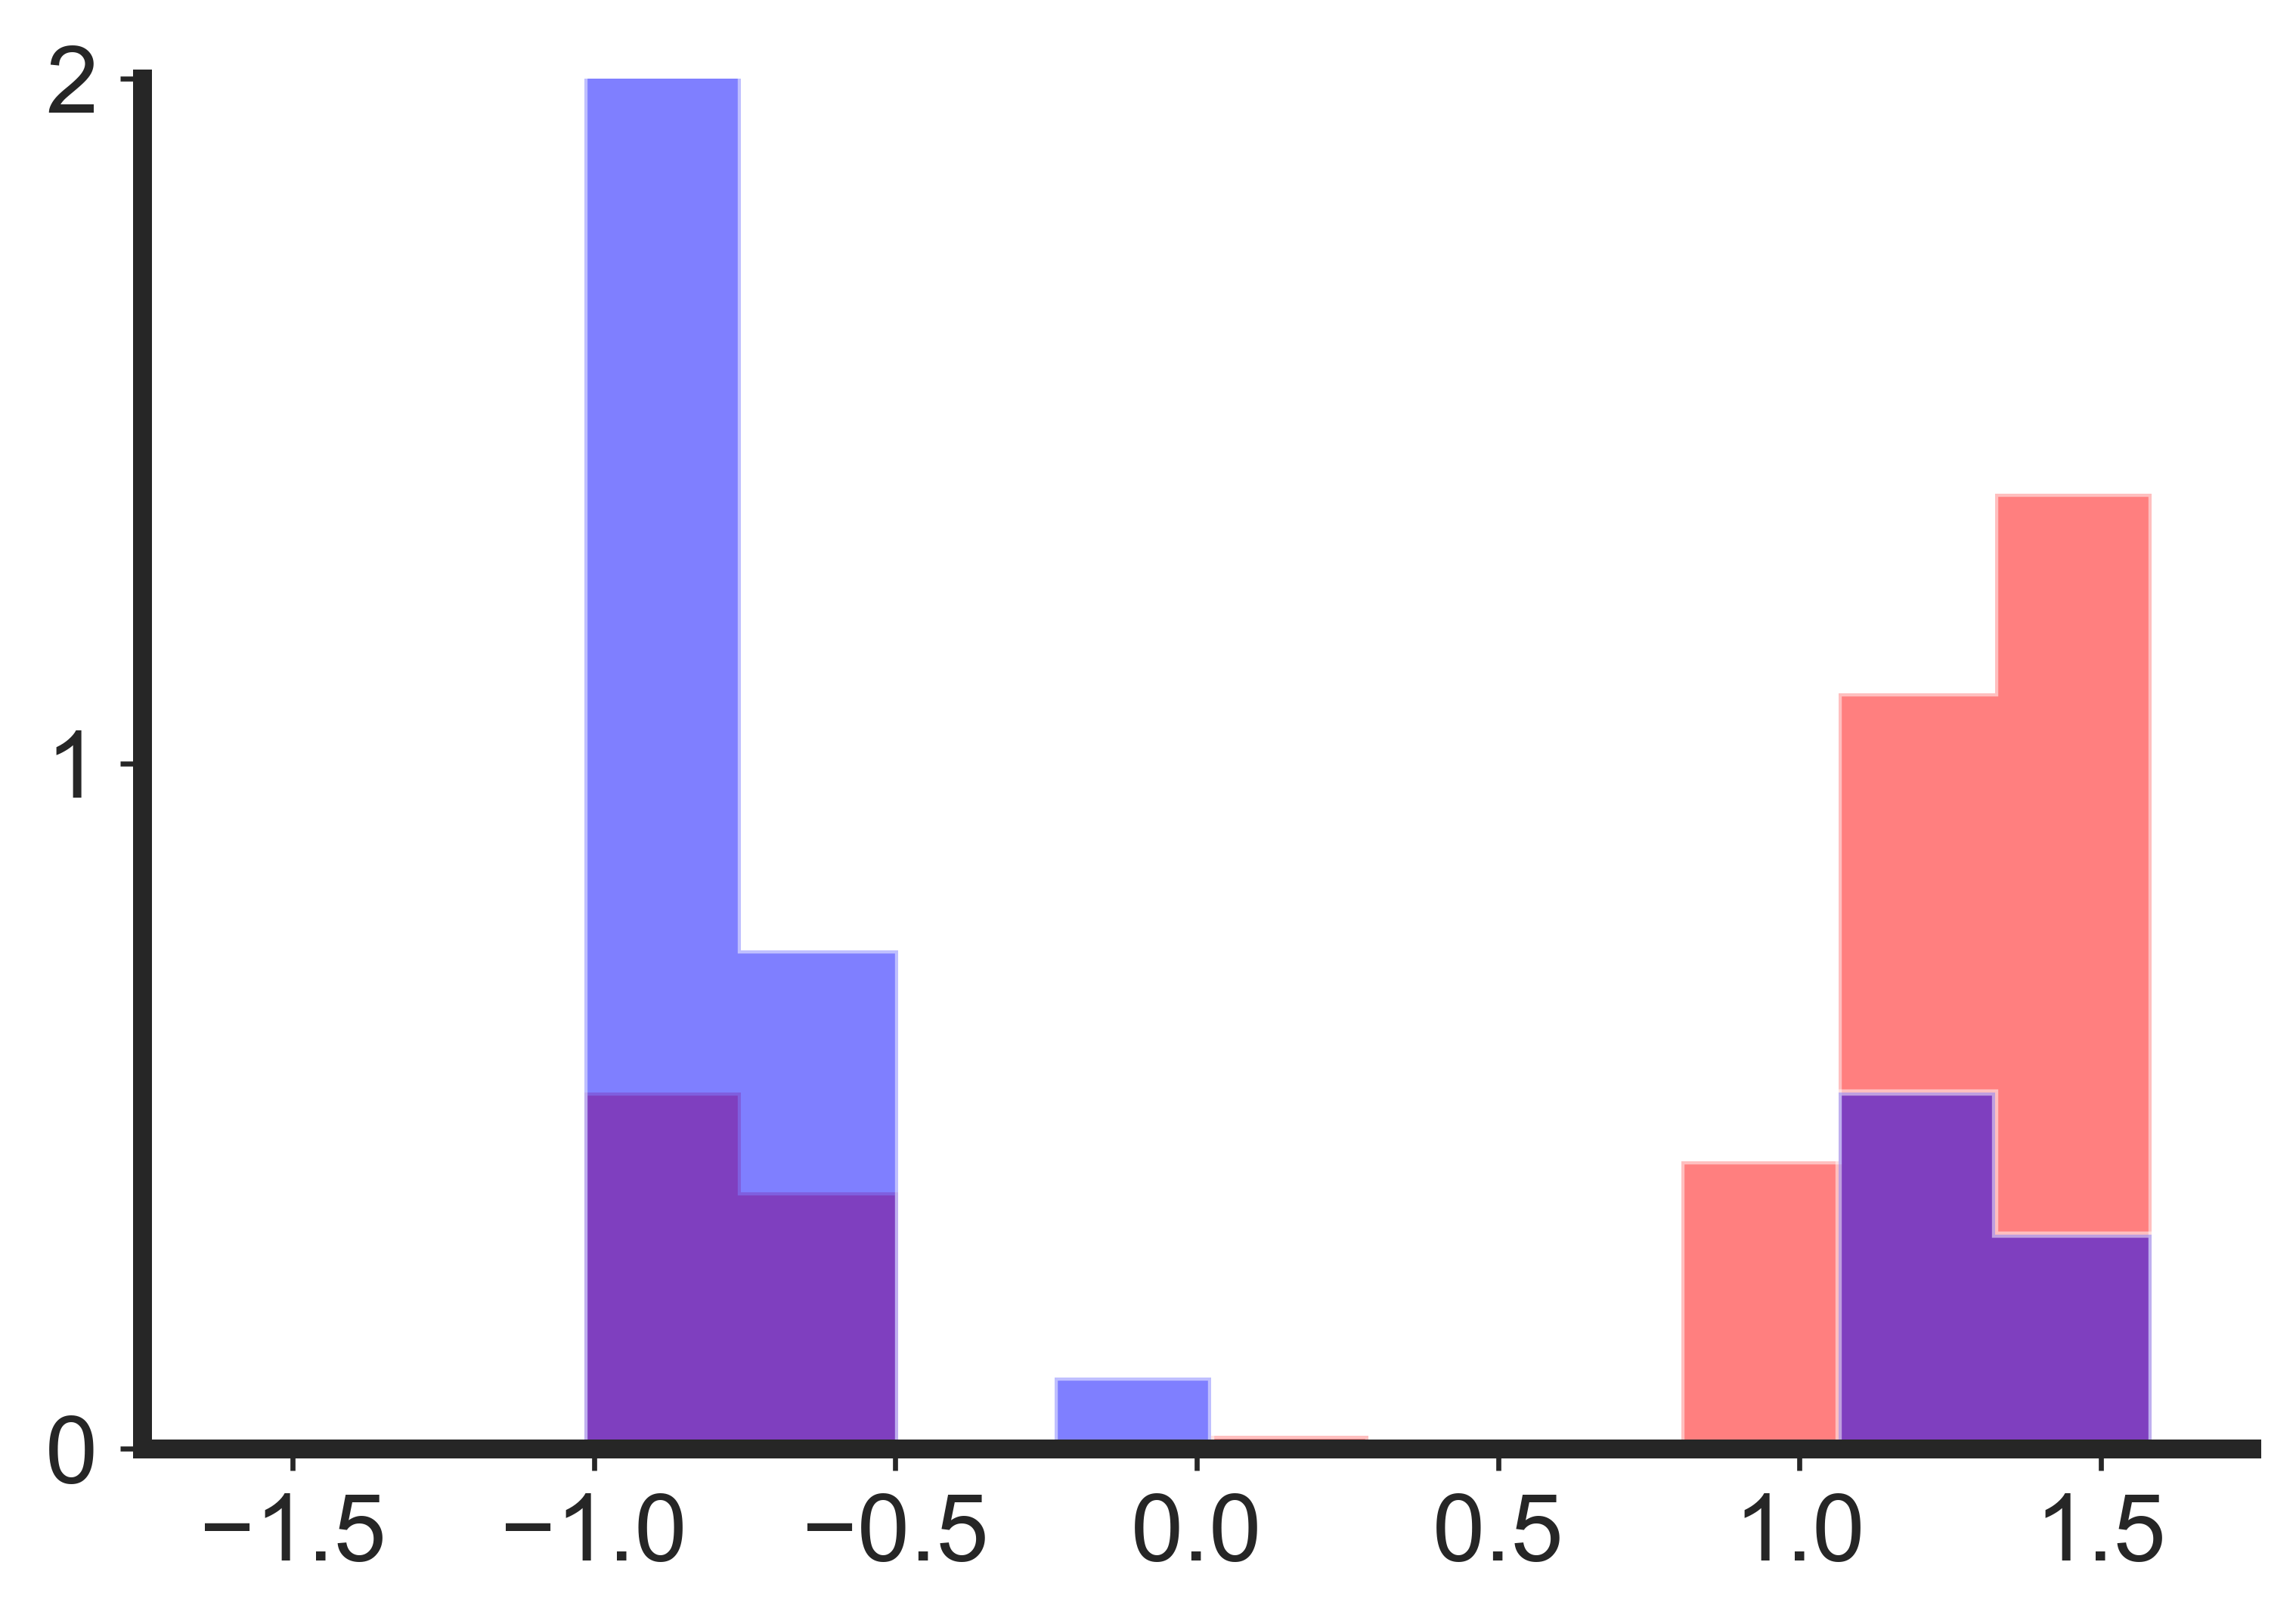

In [114]:
ckpt_name = './checkpoints/surv_15_rnaseq/'
model = 'omic'
split = 'test'
zscore = True
agg_type = 'Hazard_mean'

data = poolSurvTestPD(ckpt_name=ckpt_name, model=model, split=split, zscore=zscore, agg_type=agg_type)

norm = True
fig, ax = plt.subplots(dpi=600)

low = data[data['Survival months'] <= 365*5]
low = low[low['censored'] == 1]
#mid = data[data['Survival months'] > 365*1.6]
#mid = mid[mid['Survival months'] <= 365*7]
#mid = mid[mid['censored'] == 1]
high = data[data['Survival months'] > 365*5]
high = high[high['censored'] == 1]

sns.distplot(low['Hazard'], bins=10, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "r"}, ax=ax)
'''
sns.distplot(mid['Hazard'], bins=30, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "b"}, ax=ax)
'''
sns.distplot(high['Hazard'], bins=10, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "b"}, ax=ax)

ax.set_xlabel('')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='y', which='both', labelsize=15)
ax.tick_params(axis='x', which='both', labelsize=15)
ax.set_xticks(np.arange(-1.5, 1.51, 0.5))
plt.xlim([-1.75, 1.75])
if norm:
    ax.set_yticks(np.arange(0, 2.1, 1))
    plt.ylim([0, 2])
    
fig.savefig(ckpt_name+'/%s_HHP_V2.png' % (model))

low_o = low
high_o = high

In [115]:
cluster1 = data[data['Hazard'] < 1.25]
cluster1 = cluster1[cluster1['Hazard'] > 1.0]
num_cluster1 = cluster1.shape[0]
cluster1_II = (cluster1['Grade'] == 0).sum() / num_cluster1
cluster1_III = (cluster1['Grade'] == 1).sum() / num_cluster1
cluster1_IV = (cluster1['Grade'] == 2).sum() / num_cluster1
cluster1_ODG = (cluster1['Histomolecular subtype'] == 'ODG').sum() / num_cluster1
cluster1_IDHmut = (cluster1['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster1
cluster1_IDHwt = (cluster1['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster1
cluster1_summary = [cluster1_II, cluster1_III, cluster1_IV, cluster1_ODG, cluster1_IDHmut, cluster1_IDHwt]

cluster2 = data[data['Hazard'] > 1.25]
num_cluster2 = cluster2.shape[0]
cluster2_II = (cluster2['Grade'] == 0).sum() / num_cluster2
cluster2_III = (cluster2['Grade'] == 1).sum() / num_cluster2
cluster2_IV = (cluster2['Grade'] == 2).sum() / num_cluster2
cluster2_ODG = (cluster2['Histomolecular subtype'] == 'ODG').sum() / num_cluster2
cluster2_IDHmut = (cluster2['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster2
cluster2_IDHwt = (cluster2['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster2
cluster2_summary = [cluster2_II, cluster2_III, cluster2_IV, cluster2_ODG, cluster2_IDHmut, cluster2_IDHwt]

cluster3 = data[data['Hazard'] < -0.5]
num_cluster3 = cluster3.shape[0]
cluster3_II = (cluster3['Grade'] == 0).sum() / num_cluster3
cluster3_III = (cluster3['Grade'] == 1).sum() / num_cluster3
cluster3_IV = (cluster3['Grade'] == 2).sum() / num_cluster3
cluster3_ODG = (cluster3['Histomolecular subtype'] == 'ODG').sum() / num_cluster3
cluster3_IDHmut = (cluster3['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster3
cluster3_IDHwt = (cluster3['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster3
cluster3_summary = [cluster3_II, cluster3_III, cluster3_IV, cluster3_ODG, cluster3_IDHmut, cluster3_IDHwt]

cluster_results = pd.DataFrame([cluster3_summary, cluster1_summary, cluster2_summary])
cluster_results.index = ['-1.00 < Hazard < -0.50', '1.00 < Hazard < 1.25', '1.25 < Hazard < 1.50']
cluster_results.index.name = 'Density Region'
cluster_results.columns = ['Grade II (%)', 'Grade III (%)', 'Grade IV (%)', 'IDHwt ATC (%)', 'IDHmut ATC (%)', 'IDHwt ATC (%)']
cluster_results *= 100
pd.options.display.float_format = '{:.2f}'.format
cluster_results2 = cluster_results

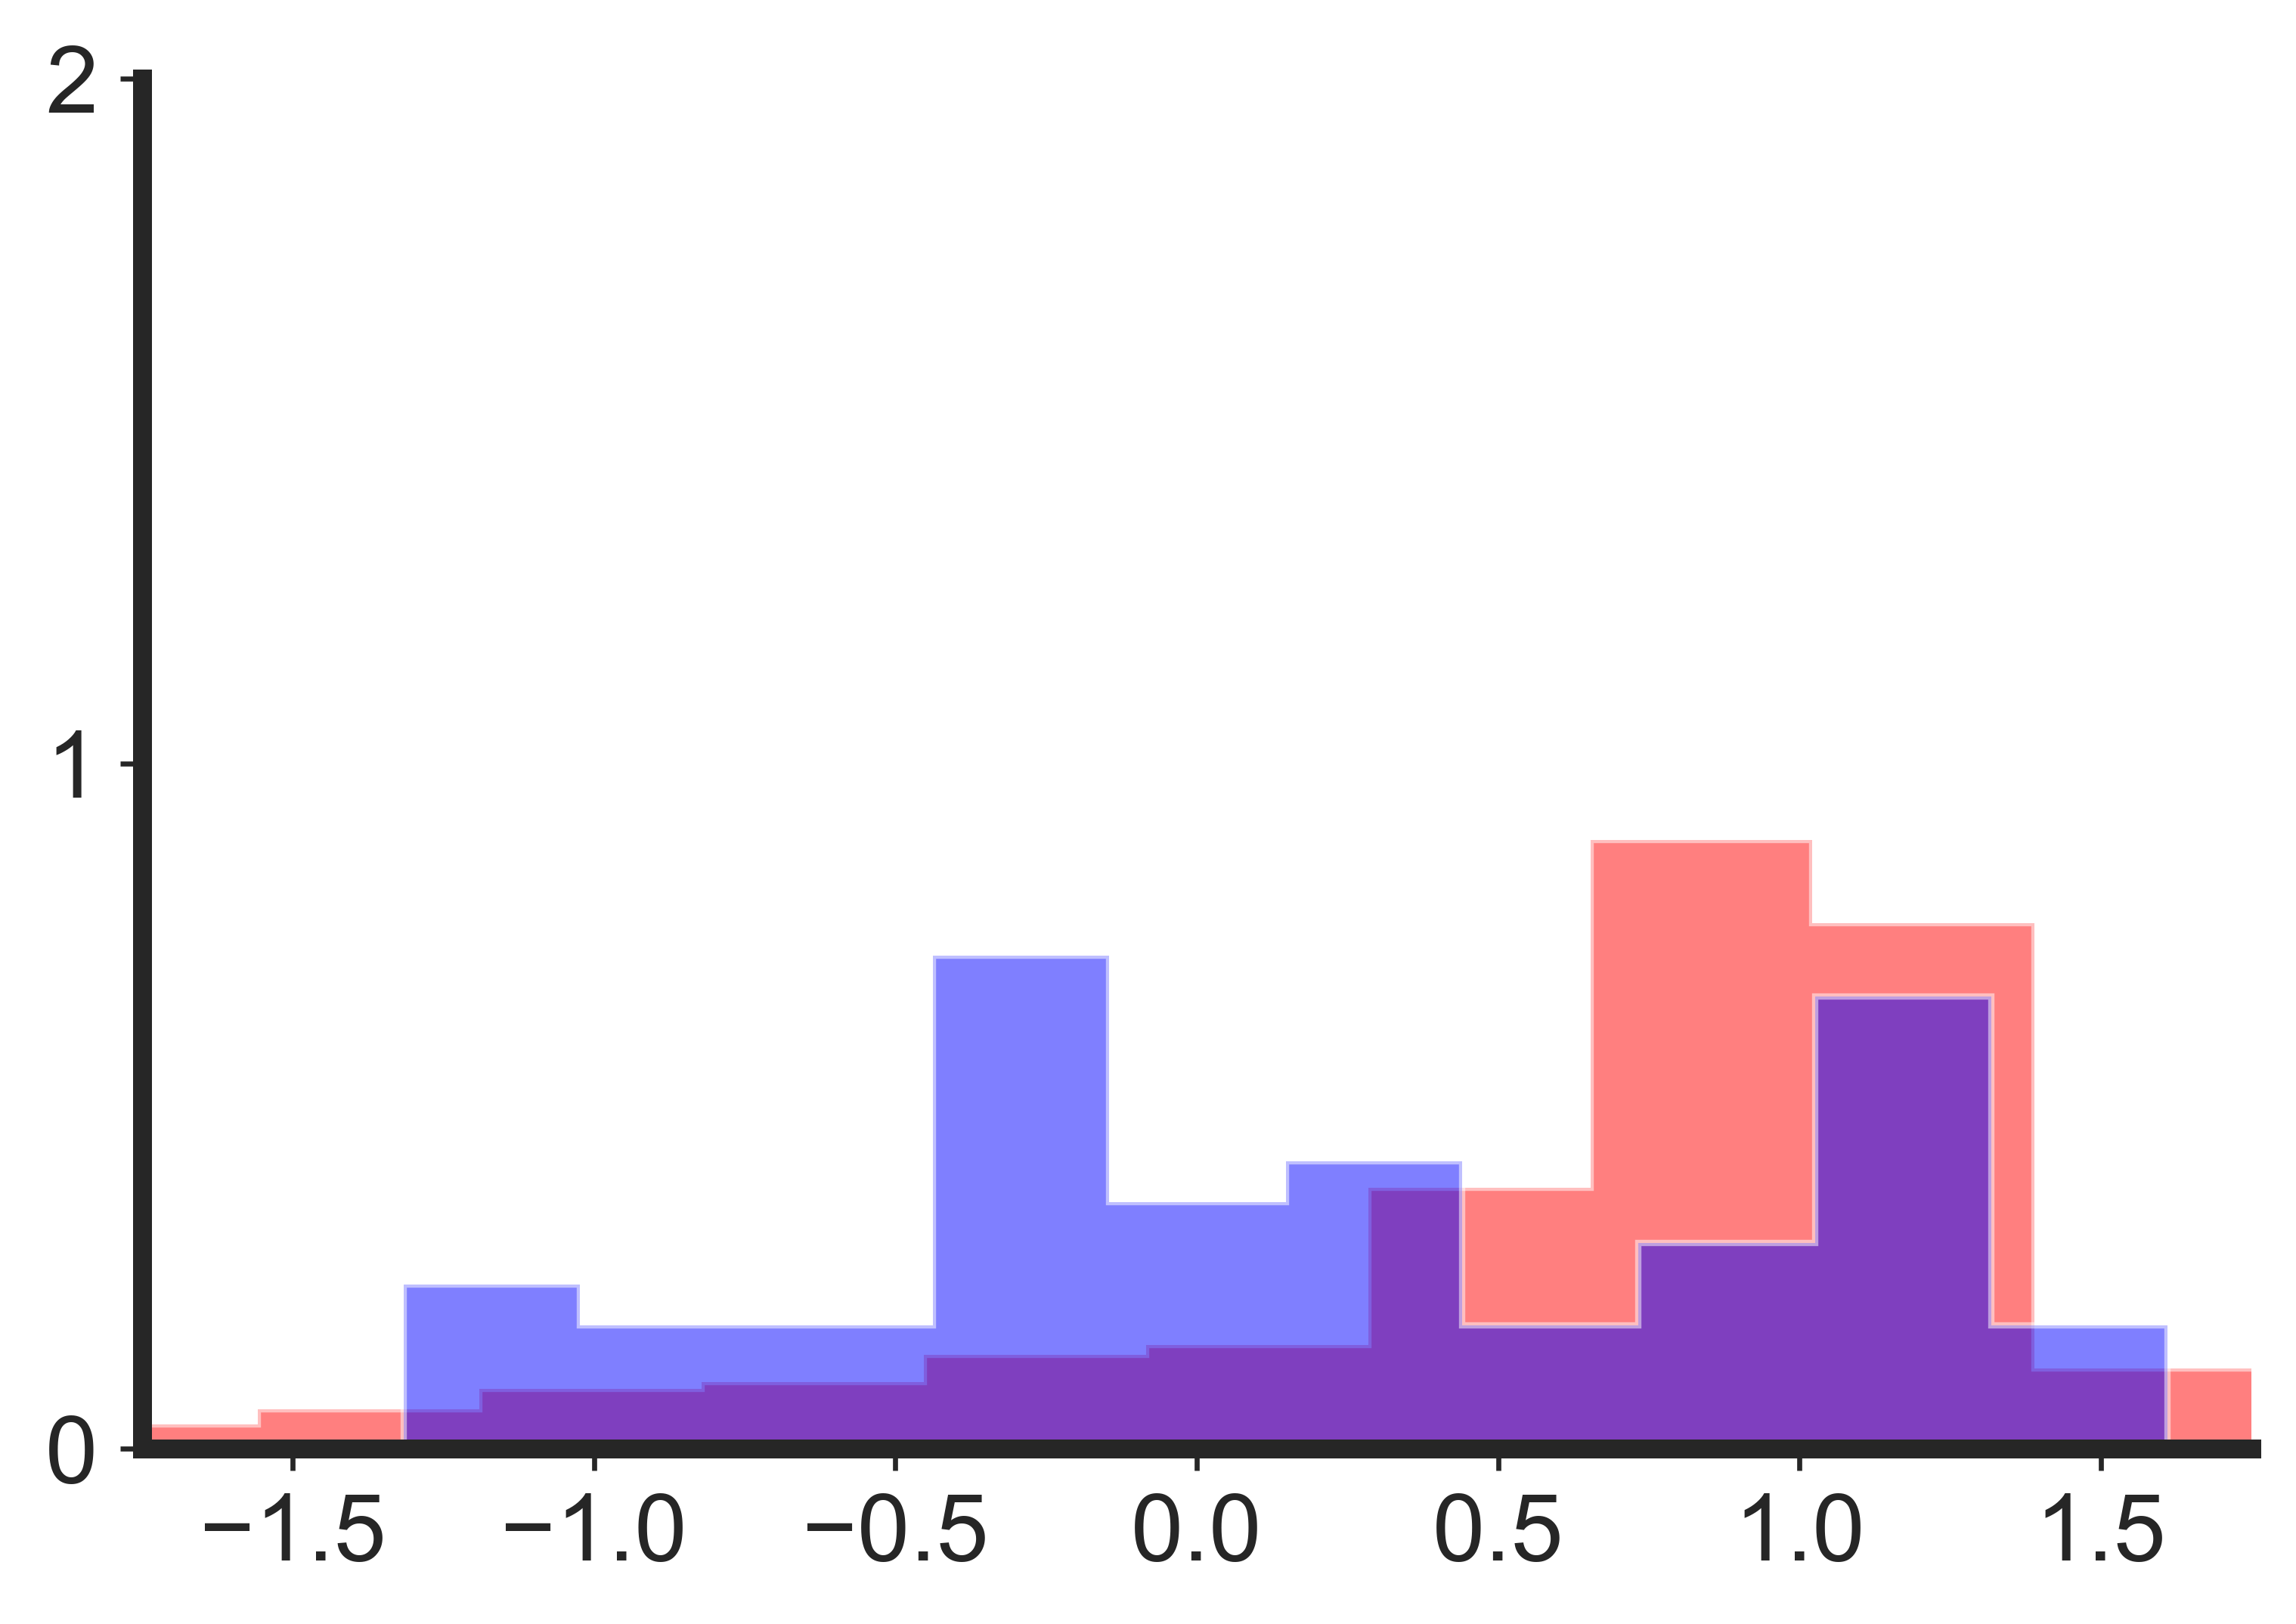

In [116]:
ckpt_name = './checkpoints/surv_15_rnaseq2/'
model = 'path'
split = 'test'
zscore = True
agg_type = 'Hazard_mean'

data = poolSurvTestPD(ckpt_name=ckpt_name, model=model, split=split, zscore=zscore, agg_type=agg_type)

norm = True
fig, ax = plt.subplots(dpi=600)

low = data[data['Survival months'] <= 365*5]
low = low[low['censored'] == 1]
#mid = data[data['Survival months'] > 365*1.6]
#mid = mid[mid['Survival months'] <= 365*7]
#mid = mid[mid['censored'] == 1]
high = data[data['Survival months'] > 365*5]
high = high[high['censored'] == 1]

sns.distplot(low['Hazard'], bins=10, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "r"}, ax=ax)
'''
sns.distplot(mid['Hazard'], bins=30, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "b"}, ax=ax)
'''
sns.distplot(high['Hazard'], bins=10, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "b"}, ax=ax)

ax.set_xlabel('')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='y', which='both', labelsize=15)
ax.tick_params(axis='x', which='both', labelsize=15)
ax.set_xticks(np.arange(-1.5, 1.51, 0.5))
plt.xlim([-1.75, 1.75])
if norm:
    ax.set_yticks(np.arange(0, 2.1, 1))
    plt.ylim([0, 2])
    
fig.savefig(ckpt_name+'/%s_HHP_V2.png' % (model))

low_p = low
high_p = high

In [117]:
cluster1 = data[data['Hazard'] < 1.0]
cluster1 = cluster1[cluster1['Hazard'] > 0.5]
num_cluster1 = cluster1.shape[0]
cluster1_II = (cluster1['Grade'] == 0).sum() / num_cluster1
cluster1_III = (cluster1['Grade'] == 1).sum() / num_cluster1
cluster1_IV = (cluster1['Grade'] == 2).sum() / num_cluster1
cluster1_ODG = (cluster1['Histomolecular subtype'] == 'ODG').sum() / num_cluster1
cluster1_IDHmut = (cluster1['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster1
cluster1_IDHwt = (cluster1['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster1
cluster1_summary = [cluster1_II, cluster1_III, cluster1_IV, cluster1_ODG, cluster1_IDHmut, cluster1_IDHwt]

cluster2 = data[data['Hazard'] > 1.0]
num_cluster2 = cluster2.shape[0]
cluster2_II = (cluster2['Grade'] == 0).sum() / num_cluster2
cluster2_III = (cluster2['Grade'] == 1).sum() / num_cluster2
cluster2_IV = (cluster2['Grade'] == 2).sum() / num_cluster2
cluster2_ODG = (cluster2['Histomolecular subtype'] == 'ODG').sum() / num_cluster2
cluster2_IDHmut = (cluster2['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster2
cluster2_IDHwt = (cluster2['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster2
cluster2_summary = [cluster2_II, cluster2_III, cluster2_IV, cluster2_ODG, cluster2_IDHmut, cluster2_IDHwt]

cluster3 = data[data['Hazard'] < 0]
cluster3 = data[data['Hazard'] > -0.5]
num_cluster3 = cluster3.shape[0]
cluster3_II = (cluster3['Grade'] == 0).sum() / num_cluster3
cluster3_III = (cluster3['Grade'] == 1).sum() / num_cluster3
cluster3_IV = (cluster3['Grade'] == 2).sum() / num_cluster3
cluster3_ODG = (cluster3['Histomolecular subtype'] == 'ODG').sum() / num_cluster3
cluster3_IDHmut = (cluster3['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster3
cluster3_IDHwt = (cluster3['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster3
cluster3_summary = [cluster3_II, cluster3_III, cluster3_IV, cluster3_ODG, cluster3_IDHmut, cluster3_IDHwt]

cluster4 = data[data['Hazard'] < -0.5]
num_cluster4 = cluster4.shape[0]
cluster4_II = (cluster4['Grade'] == 0).sum() / num_cluster4
cluster4_III = (cluster4['Grade'] == 1).sum() / num_cluster4
cluster4_IV = (cluster4['Grade'] == 2).sum() / num_cluster4
cluster4_ODG = (cluster4['Histomolecular subtype'] == 'ODG').sum() / num_cluster4
cluster4_IDHmut = (cluster4['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster4
cluster4_IDHwt = (cluster4['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster4
cluster4_summary = [cluster4_II, cluster4_III, cluster4_IV, cluster4_ODG, cluster4_IDHmut, cluster4_IDHwt]


cluster_results = pd.DataFrame([cluster3_summary, cluster1_summary, cluster2_summary])
cluster_results.index = ['-0.50 < Hazard < 0.00', '0.50 < Hazard < 1.00', '1.00 < Hazard < 1.50']
cluster_results.index.name = 'Density Region'
cluster_results.columns = ['Grade II (%)', 'Grade III (%)', 'Grade IV (%)', 'IDHwt ATC (%)', 'IDHmut ATC (%)', 'IDHwt ATC (%)']
cluster_results *= 100
pd.options.display.float_format = '{:.2f}'.format
cluster_results3 = cluster_results

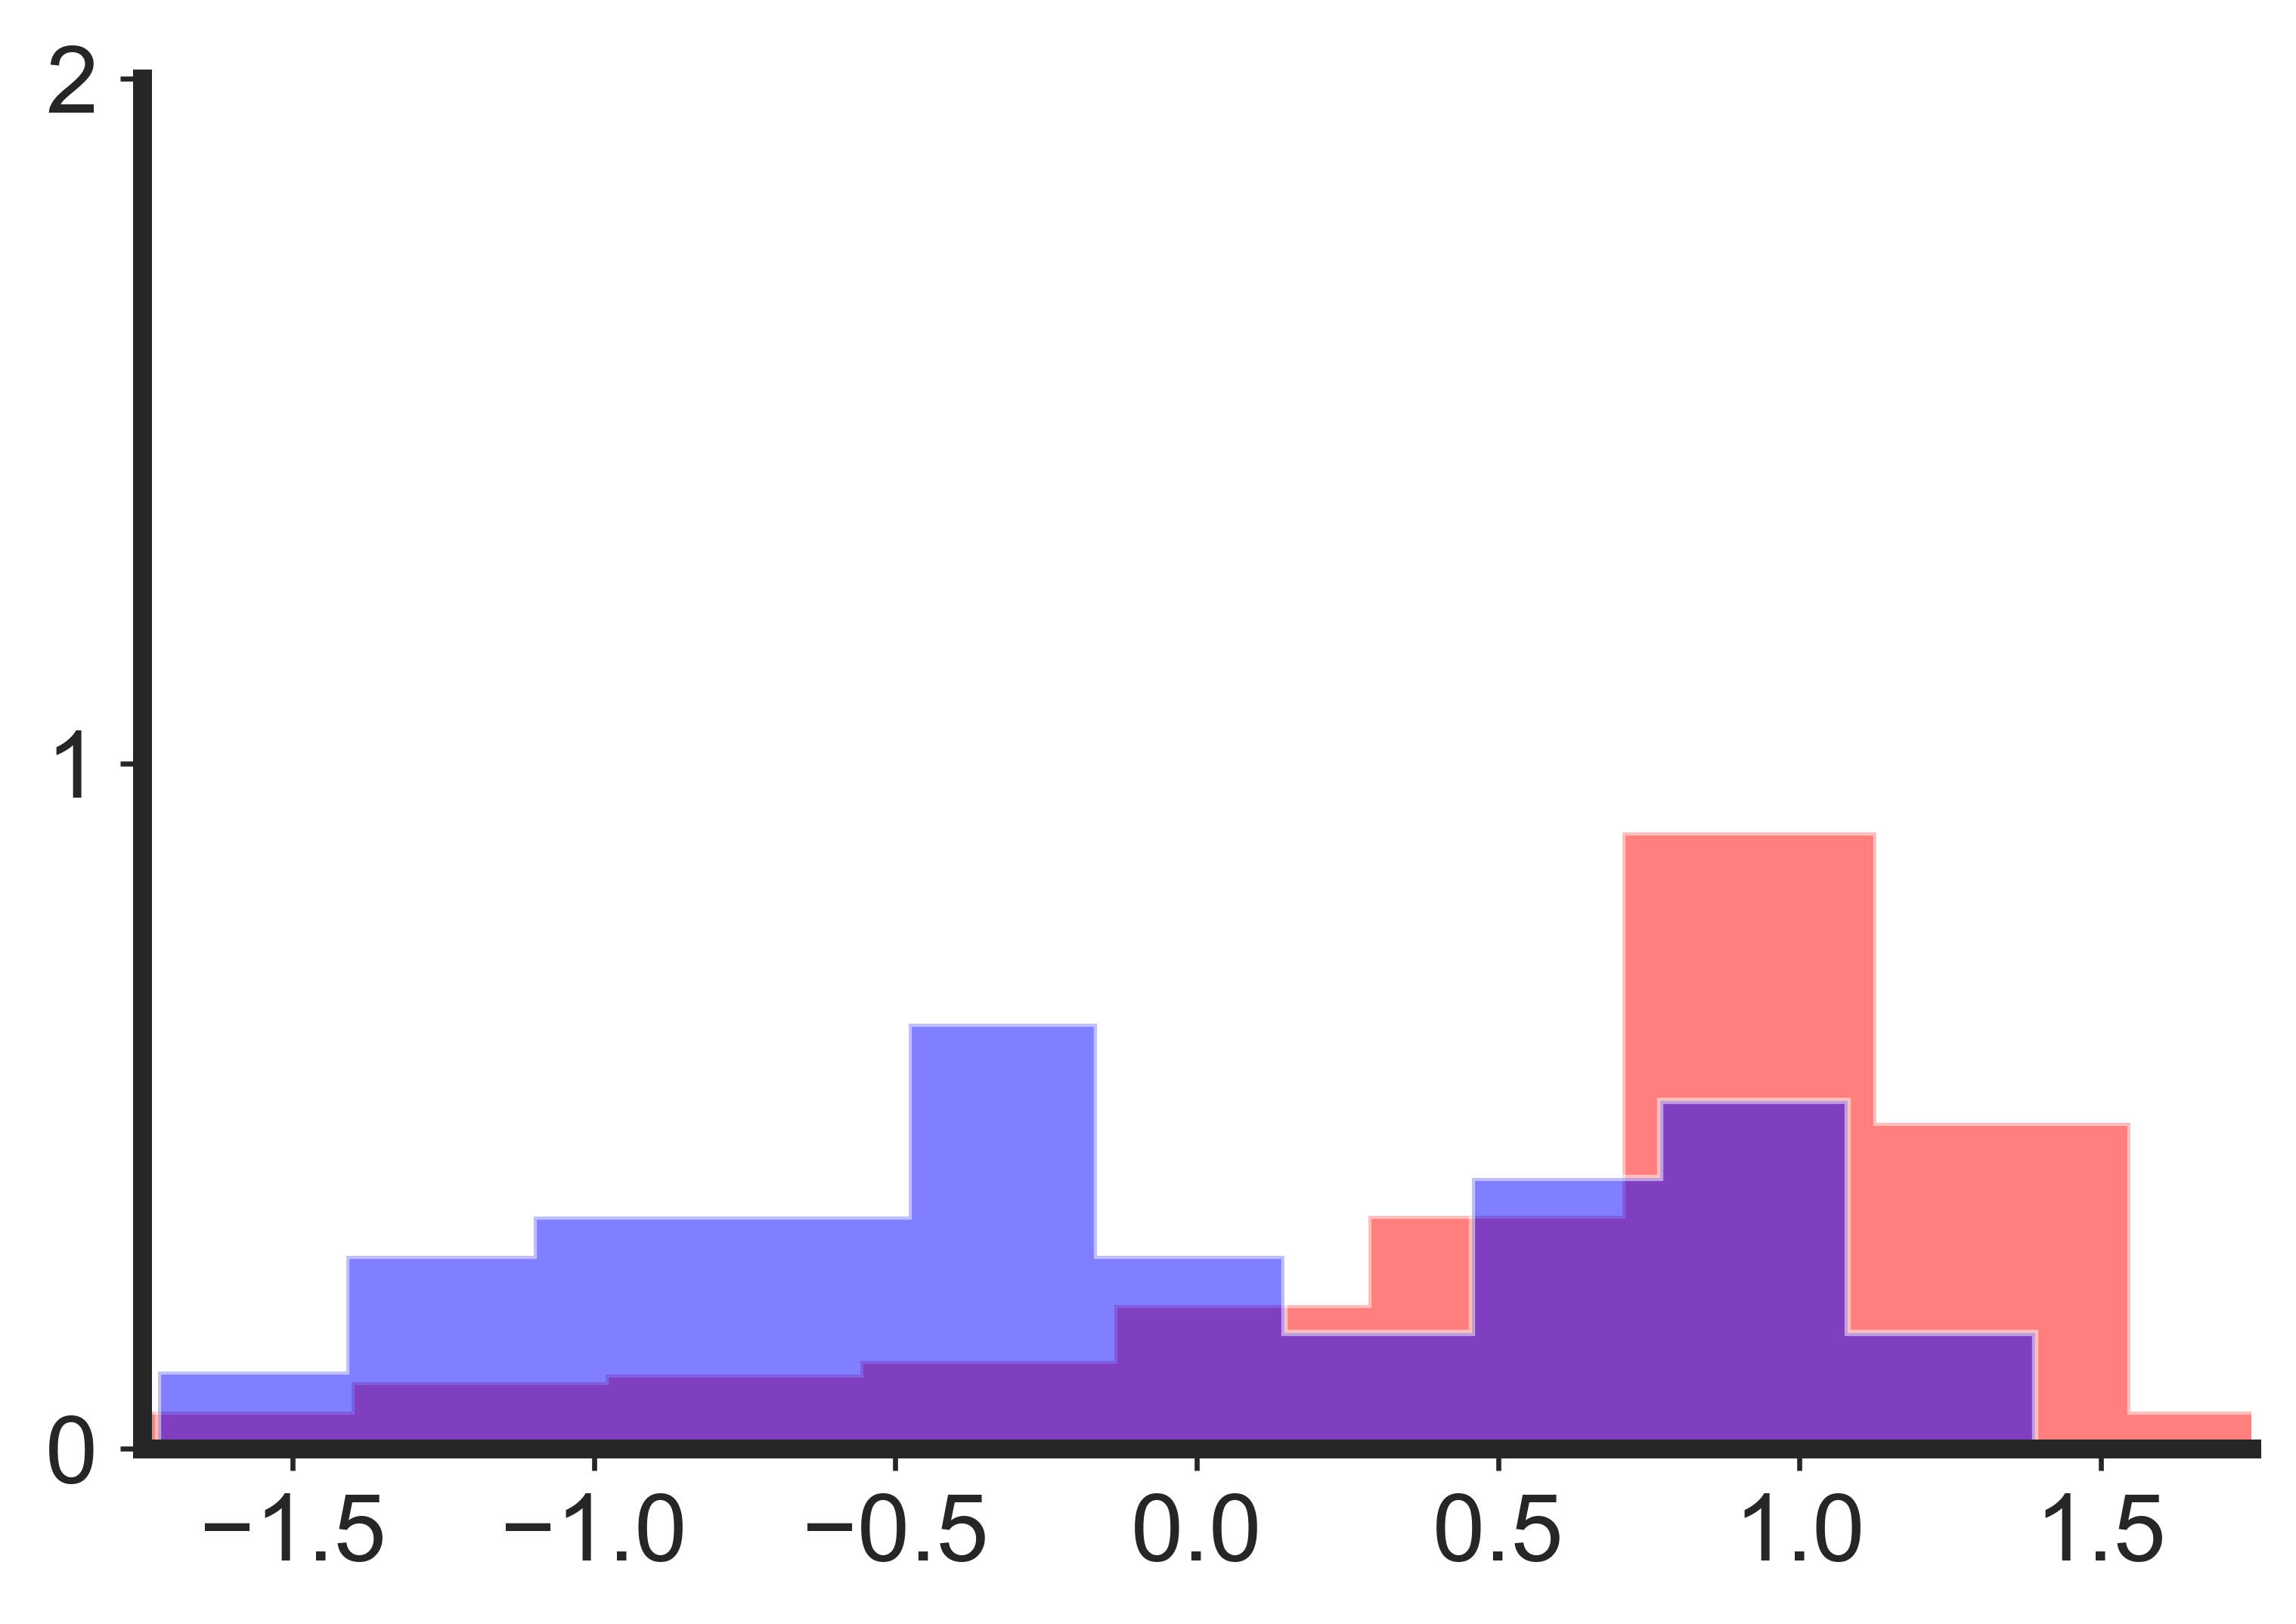

In [118]:
ckpt_name = './checkpoints/surv_15_rnaseq/'
model = 'graph'
split = 'test'
zscore = True
agg_type = 'Hazard_mean'

data = poolSurvTestPD(ckpt_name=ckpt_name, model=model, split=split, zscore=zscore, agg_type=agg_type)

norm = True
fig, ax = plt.subplots(dpi=600)

low = data[data['Survival months'] <= 365*5]
low = low[low['censored'] == 1]
#mid = data[data['Survival months'] > 365*1.6]
#mid = mid[mid['Survival months'] <= 365*7]
#mid = mid[mid['censored'] == 1]
high = data[data['Survival months'] > 365*5]
high = high[high['censored'] == 1]

sns.distplot(low['Hazard'], bins=10, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "r"}, ax=ax)
'''
sns.distplot(mid['Hazard'], bins=30, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "b"}, ax=ax)
'''
sns.distplot(high['Hazard'], bins=10, kde=False, norm_hist=norm,
             #kde_kws={"color": "k", "lw": 2},
             hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "b"}, ax=ax)

ax.set_xlabel('')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='y', which='both', labelsize=15)
ax.tick_params(axis='x', which='both', labelsize=15)
ax.set_xticks(np.arange(-1.5, 1.51, 0.5))
plt.xlim([-1.75, 1.75])
if norm:
    ax.set_yticks(np.arange(0, 2.1, 1))
    plt.ylim([0, 2])
    
fig.savefig(ckpt_name+'/%s_HHP_V2.png' % (model))

low_g = low
high_g = high

In [119]:
cluster1 = data[data['Hazard'] < 1.0]
cluster1 = cluster1[cluster1['Hazard'] > 0.5]
num_cluster1 = cluster1.shape[0]
cluster1_II = (cluster1['Grade'] == 0).sum() / num_cluster1
cluster1_III = (cluster1['Grade'] == 1).sum() / num_cluster1
cluster1_IV = (cluster1['Grade'] == 2).sum() / num_cluster1
cluster1_ODG = (cluster1['Histomolecular subtype'] == 'ODG').sum() / num_cluster1
cluster1_IDHmut = (cluster1['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster1
cluster1_IDHwt = (cluster1['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster1
cluster1_summary = [cluster1_II, cluster1_III, cluster1_IV, cluster1_ODG, cluster1_IDHmut, cluster1_IDHwt]

cluster2 = data[data['Hazard'] > 1.0]
num_cluster2 = cluster2.shape[0]
cluster2_II = (cluster2['Grade'] == 0).sum() / num_cluster2
cluster2_III = (cluster2['Grade'] == 1).sum() / num_cluster2
cluster2_IV = (cluster2['Grade'] == 2).sum() / num_cluster2
cluster2_ODG = (cluster2['Histomolecular subtype'] == 'ODG').sum() / num_cluster2
cluster2_IDHmut = (cluster2['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster2
cluster2_IDHwt = (cluster2['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster2
cluster2_summary = [cluster2_II, cluster2_III, cluster2_IV, cluster2_ODG, cluster2_IDHmut, cluster2_IDHwt]

cluster3 = data[data['Hazard'] < 0]
cluster3 = data[data['Hazard'] > -0.5]
num_cluster3 = cluster3.shape[0]
cluster3_II = (cluster3['Grade'] == 0).sum() / num_cluster3
cluster3_III = (cluster3['Grade'] == 1).sum() / num_cluster3
cluster3_IV = (cluster3['Grade'] == 2).sum() / num_cluster3
cluster3_ODG = (cluster3['Histomolecular subtype'] == 'ODG').sum() / num_cluster3
cluster3_IDHmut = (cluster3['Histomolecular subtype'] == 'idhmut_ATC').sum() / num_cluster3
cluster3_IDHwt = (cluster3['Histomolecular subtype'] == 'idhwt_ATC').sum() / num_cluster3
cluster3_summary = [cluster3_II, cluster3_III, cluster3_IV, cluster3_ODG, cluster3_IDHmut, cluster3_IDHwt]


cluster_results = pd.DataFrame([cluster3_summary, cluster1_summary, cluster2_summary])
cluster_results.index = ['-0.50 < Hazard < 0.00', '0.50 < Hazard < 1.00', '1.00 < Hazard < 1.50']
cluster_results.index.name = 'Density Region'
cluster_results.columns = ['Grade II (%)', 'Grade III (%)', 'Grade IV (%)', 'IDHwt ATC (%)', 'IDHmut ATC (%)', 'IDHwt ATC (%)']
cluster_results *= 100
pd.options.display.float_format = '{:.2f}'.format
cluster_results4 = cluster_results

In [120]:
cluster_results = pd.concat([cluster_results3, cluster_results2, cluster_results1])

In [121]:
print(cluster_results.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Grade II (\%) &  Grade III (\%) &  Grade IV (\%) &  IDHwt ATC (\%) &  IDHmut ATC (\%) &  IDHwt ATC (\%) \\
Density Region         &               &                &               &                &                 &                \\
\midrule
-0.50 < Hazard < 0.00  &          8.38 &          20.78 &         69.57 &           6.37 &            9.65 &          60.19 \\
0.50 < Hazard < 1.00   &          1.80 &          10.27 &         87.93 &           2.16 &            4.86 &          75.32 \\
1.00 < Hazard < 1.50   &          2.25 &           6.98 &         90.32 &           0.68 &            5.41 &          70.50 \\
-1.00 < Hazard < -0.50 &         47.36 &          39.60 &          1.80 &          26.10 &           23.62 &           1.01 \\
1.00 < Hazard < 1.25   &         15.42 &          43.17 &         40.97 &           4.85 &           12.78 &          63.88 \\
1.25 < Hazard < 1.50   &         12.85 &          39.50 &         46.39 &         